# **STAT 200 Project (120 points)**

#### **DANIA BAWAB**


<br>

---

<br>






## Data

Data for the project is available [here](https://raw.githubusercontent.com/khasenst/datasets_teaching/main/copd_data_project.csv).

<br>

---

<br>






## Introduction

Chronic obstructive pulmonary disease (COPD) affects over 16 million Americans and is the fourth leading cause of death in the United States behind heart disease, cancer, and accidental death. While COPD can result from various toxic inhalations or asthma, it is most commonly associated with cigarette smoking.

<br>

COPD severity is typically measured by a device called a spirometer. Patients forcefully exhale into the device and the volume of air exhaled is used as a measure for the severity of disease (less air exhaled $\Rightarrow$ worse disease). Data collected by the COPDGene research group includes spirometry data on thousands of research participants.

<br>

Spirometry measures in the dataset:
* The forced expiratory volume (`FEV1`) is the volume of air exhaled in 1 second
* The forced vital capacity (`FVC`) is the total volume of air exhaled after a full breath
* `FEV1_FVC_ratio` is the ratio between `FEV1` and `FVC` (smaller $\Rightarrow$ worse disease)
* `FEV1_phase2` is the `FEV1` of research participants 5 years later

<br>

The overall task in this project is to analyze the relationship between FEV1 at follow-up `FEV1_phase2` and other variables in the dataset.

<br>

---

<br>






<br>

---

<br>






In [ ]:
#load COPDGene dataset
COPDGene <- read.csv("https://raw.githubusercontent.com/khasenst/datasets_teaching/main/copd_data_project.csv")
#show first few lines
head(COPDGene)

,sid,visit_year,visit_date,visit_age,gender,race,height_cm,weight_kg,sysBP,diasBP,⋯,total_lung_capacity,pct_emphysema,functional_residual_capacity,pct_gastrapping,insp_meanatt,exp_meanatt,FEV1_FVC_ratio,FEV1,FVC,FEV1_phase2
,<chr>,<int>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<int>,<int>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,10005Q,2008,1/15/2008,54.5,Female,White,159.9,73.0,130,80,⋯,5.6636,0.926851,2.4766,6.80077,-830.343,-650.526,0.77,2.921,3.805,2.622
2,10006S,2008,1/15/2008,62.3,Female,White,162.6,86.0,170,80,⋯,5.2325,14.005900,-1.0000,-1.00000,-841.880,-1.000,0.43,1.288,3.022,NA
3,10010J,2008,1/15/2008,65.9,Female,White,162.1,62.8,96,63,⋯,5.1960,1.683760,3.8993,41.34930,-833.429,-789.595,0.53,1.008,1.909,1.087
4,10015T,2008,2/15/2008,59.6,Male,White,182.9,110.0,142,88,⋯,6.3971,9.330450,-1.0000,-1.00000,-841.315,-1.000,0.51,1.906,3.732,2.002
5,10017X,2008,6/15/2008,67.5,Male,White,179.1,83.0,106,72,⋯,7.8935,36.262400,4.1043,46.17690,-887.947,-792.397,0.57,2.748,4.827,2.178
6,10022Q,2008,2/15/2008,69.8,Female,White,158.8,78.0,122,78,⋯,5.1016,30.484400,-1.0000,-1.00000,-865.608,-1.000,0.53,1.076,2.047,0.924


In [ ]:
#removing all the NAs and storing as dat1
dat1 <- na.omit(COPDGene)
#finding the number of rows in dat1
nrow(dat1)

[1] 4000

The dataset 'dat1' has 4000 rows.

In [ ]:
#finding the rows where FEV1_phase2 is NA
narows <- which(is.na(COPDGene$FEV1_phase2))
#creating a dataset 'dat2' with the NA rows
dat2 <- COPDGene[narows,]
#finding the number of rows in dat2
nrow(dat2)

[1] 1747

The dataset 'dat2' has 1747 rows.

<br>

---

<br>






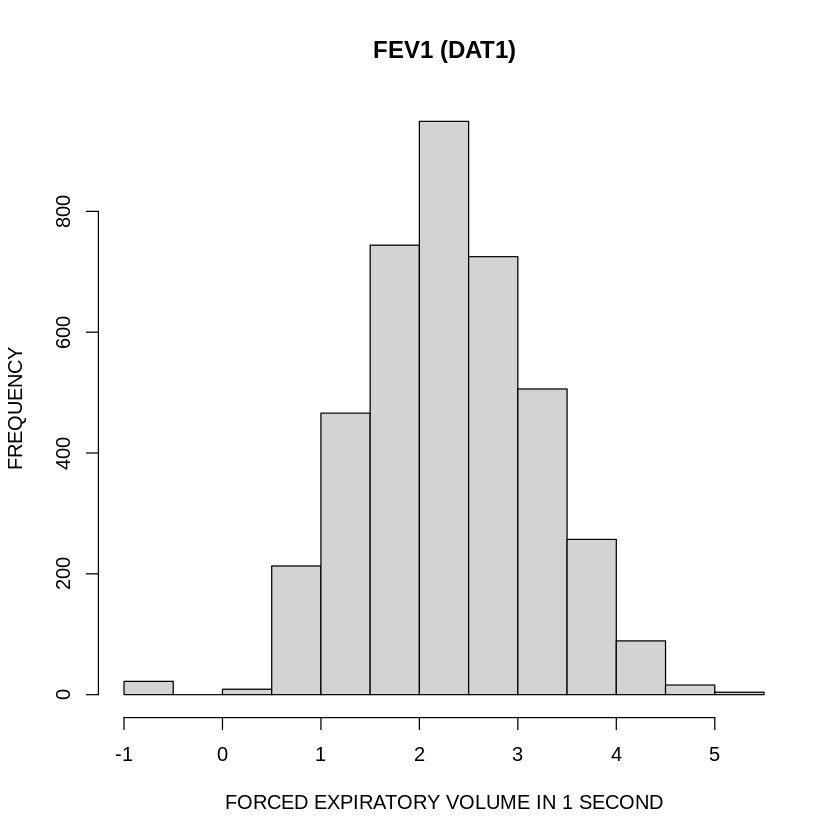

In [ ]:
#plotting a histogram of FEV1 from dat1
hist(dat1$FEV1,main = "FEV1 (DAT1)", xlab = "FORCED EXPIRATORY VOLUME IN 1 SECOND", ylab = "FREQUENCY")

In [ ]:
# Function to calculate percentage of values within given SD
calc_pct_dev <- function(variable, nb_sd) {
#Finding the mean of the given variable
var_mean <- mean(variable)
#Finding the SD of the given variable
var_sd <- sd(variable)
#Finding the range of the data within the given SD
lower <- var_mean - nb_sd * var_sd
upper <- var_mean + nb_sd * var_sd
#Finding the average of the range
out <- sum(variable > lower & variable < upper) / length(variable)
#Returning out
return(out)
}

In [ ]:
#Calculating the percentage of FEV1 values within 1 SD of the mean
calc_pct_dev(dat1$FEV1,1)

[1] 0.67575

The percentage of FEV1 values within 1 SD of the mean is 67.6%.

In [ ]:
#Calculating the percentage of FEV1 values within 2 SD of the mean
calc_pct_dev(dat1$FEV1,2)

[1] 0.9675

The percentage of FEV1 values within 2 SD of the mean is 96.8%.

The values calculated in tasks 2.1-2.3, show that it the FEV1 variable is approximately normal. The historgram from task 2.1 follows the distribution of a normal graph. Additionally, the perecntage of values within 1 and 2 standard deviations is approximately equal to the values of a normally distributed graph.  

<br>

---

<br>






[1] 166.8

[1] 34.9

[1] 19.34749

[1] 84.0652

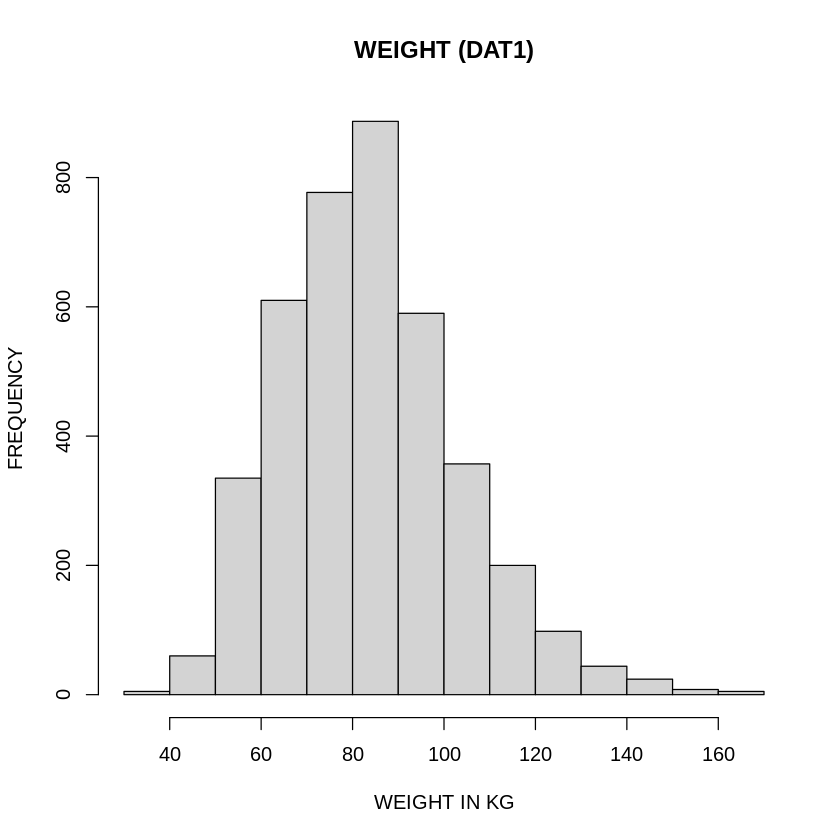

In [ ]:
#plotting a histogram of weight from dat1
hist(dat1$weight_kg, main = "WEIGHT (DAT1)", xlab = "WEIGHT IN KG", ylab = "FREQUENCY")
#finding the max of weight from dat1
max(dat1$weight_kg)
#finding the min of weight from dat1
min(dat1$weight_kg)
#finding the sd of weight from dat1
sd(dat1$weight_kg)
#finding the mean of weight from dat1
mean(dat1$weight_kg)

This histogram is of the weight of the patients in KG. The range is from 34.9 kg to 166.8 kg. The mean is at 84.1 kg. The standard devitation is around 19.3 kg. The histrogram is slightly right skewed, which represents the mean is greater than the median. The majority of patients are in the 60-90 kg range.

[1] 208.3

[1] 140

[1] 9.475275

[1] 169.8671

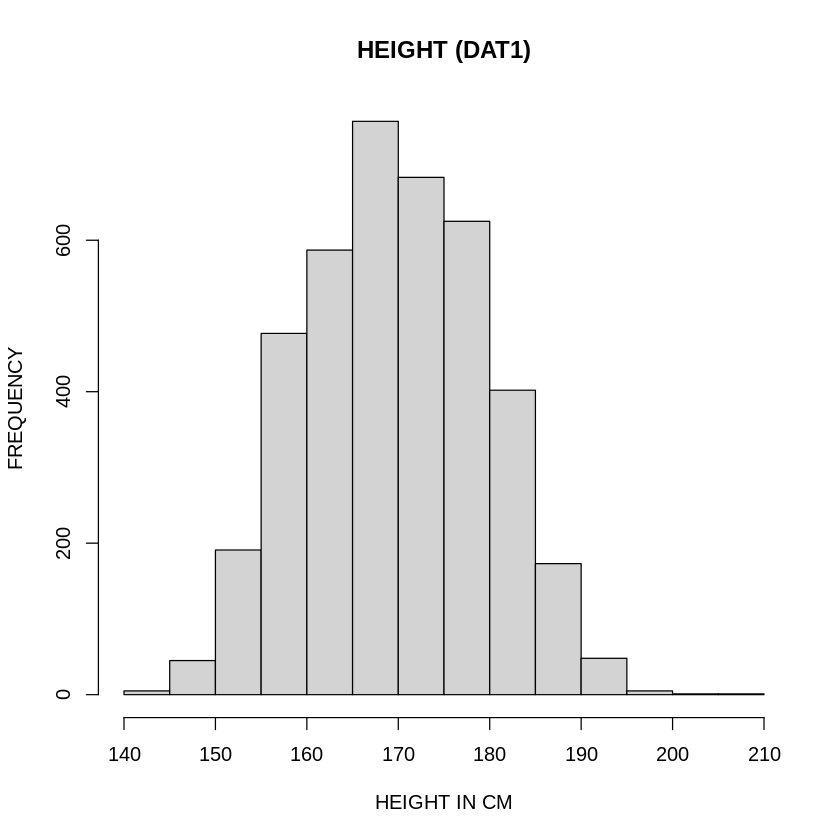

In [ ]:
#plotting a histogram of height from dat1
hist(dat1$height_cm, main = "HEIGHT (DAT1)", xlab = "HEIGHT IN CM", ylab = "FREQUENCY")
#finding the max of height from dat1
max(dat1$height_cm)
#finding the min of height from dat1
min(dat1$height_cm)
#finding the sd of height from dat1
sd(dat1$height_cm)
#finding the mean of height from dat1
mean(dat1$height_cm)

This histogram is of the height of the patients in CM. The range is from 140 CM to 208.3 CM. The mean is at 169.9 CM. The standard devitation is around 9.48 CM. The histrogram is mainly normal, which represents the mean is around the same as the median. The majority of patients are centered around the mean.

<br>

---

<br>






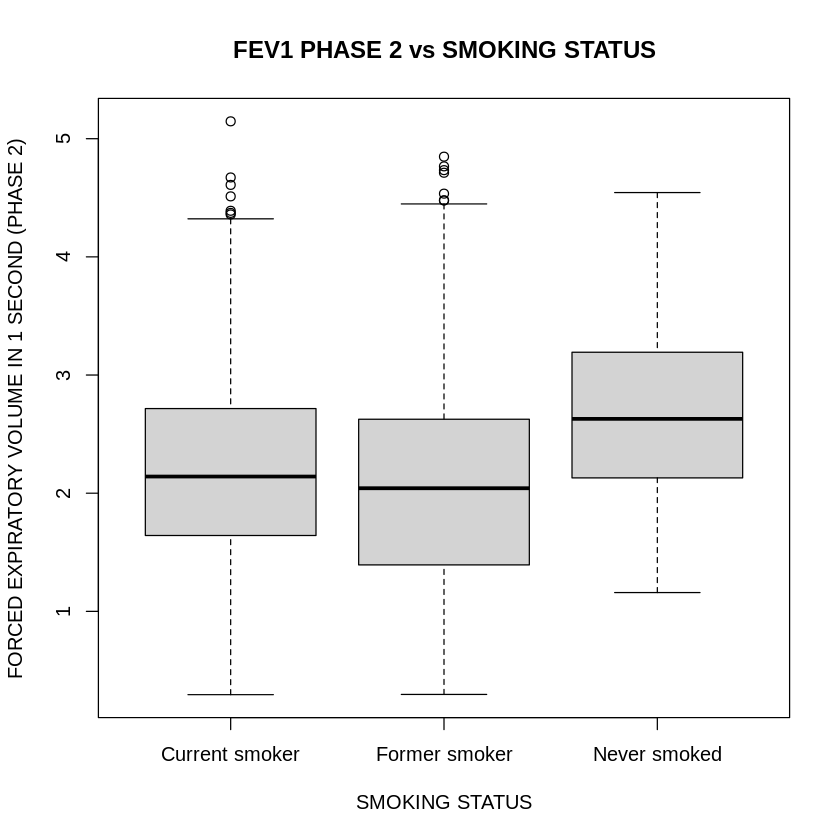

In [ ]:
#plotting a boxplot for FEV1_phase2 vs. smoking_status
boxplot(FEV1_phase2 ~ smoking_status, data=dat1, main= "FEV1 PHASE 2 vs SMOKING STATUS", xlab = "SMOKING STATUS", ylab = "FORCED EXPIRATORY VOLUME IN 1 SECOND (PHASE 2)")

The group with the best breating capacity is the group which has never smoked before.

In [ ]:
#selecting the rows corresponding to the smoking status of current and former smokers
current <- dat1$FEV1_phase2[dat1$smoking_status == "Current smoker"]
former <- dat1$FEV1_phase2[dat1$smoking_status == "Former smoker"]
#creating a 95% confidence interval
t.test(current, former)


	Welch Two Sample t-test

data:  current and former
t = 5.0794, df = 3933.1, p-value = 3.962e-07
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 0.08155305 0.18408473
sample estimates:
mean of x mean of y 
 2.179463  2.046644 


The confidence interval of the difference of FEV1 phase 2 values between patients who are current and former smokers is 0.08155305 to 0.18408473. This range is a representation of the values which contain the true difference between the current and former smokers at 95% confidence. Due to the fact that the range does not include 0, this proves that the two averages are not equal.


<br>

---

<br>






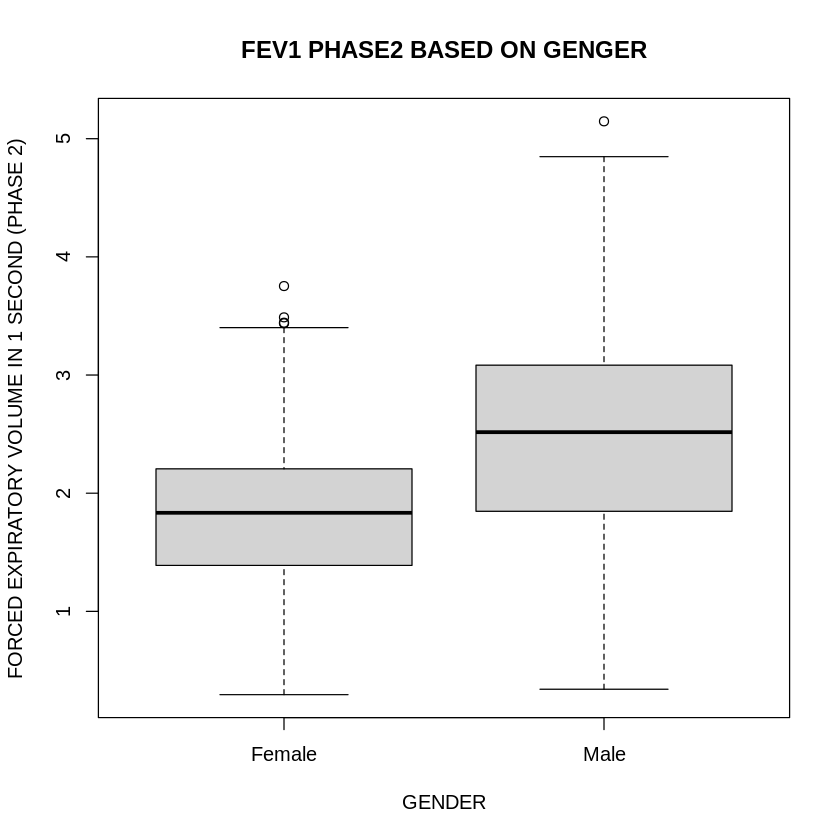

In [ ]:
#plotting a boxplot for FEV1_phase2 vs. gender
boxplot(FEV1_phase2~gender, data=COPDGene, main= "FEV1 PHASE2 BASED ON GENGER", xlab = "GENDER", ylab = "FORCED EXPIRATORY VOLUME IN 1 SECOND (PHASE 2)")

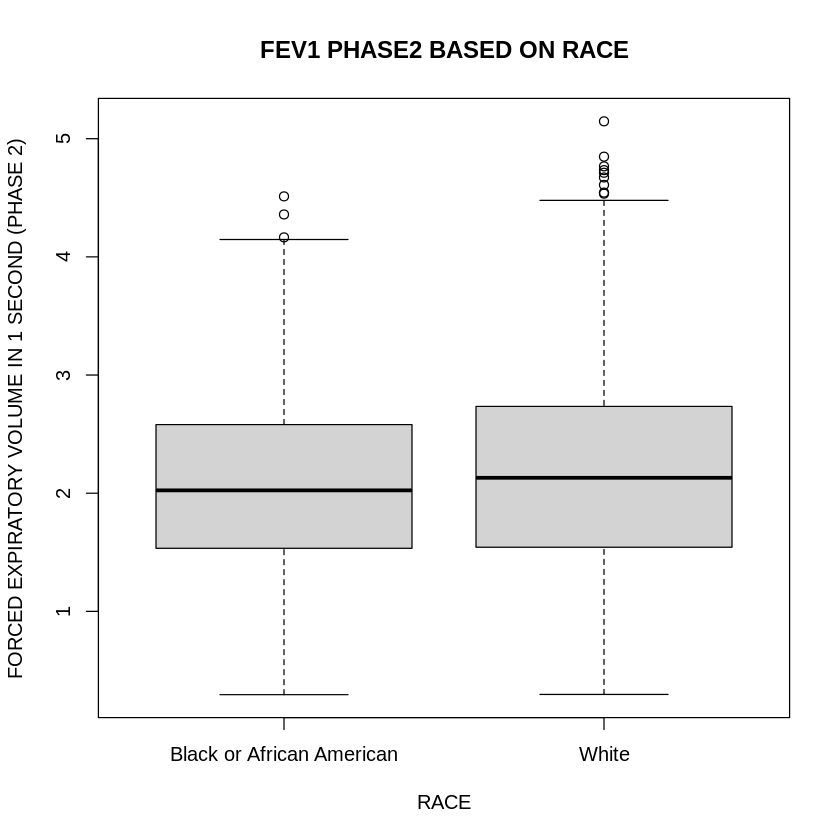

In [ ]:
#plotting a boxplot for FEV1_phase2 vs. race
boxplot(FEV1_phase2~race, data=COPDGene, main= "FEV1 PHASE2 BASED ON RACE", xlab = "RACE", ylab = "FORCED EXPIRATORY VOLUME IN 1 SECOND (PHASE 2)")

In [ ]:
#selecting the rows corresponding to the gender of female or male
Females <- dat1$FEV1_phase2[dat1$gender == "Female"]
Males <- dat1$FEV1_phase2[dat1$gender == "Male"]
#creating a 95% confidence interval
t.test(Males, Females)


	Welch Two Sample t-test

data:  Males and Females
t = 26.837, df = 3591.6, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 0.5976740 0.6918855
sample estimates:
mean of x mean of y 
 2.441361  1.796581 


In [ ]:
#selecting the rows corresponding to the race of white or black/african american
W <- dat1$FEV1_phase2[dat1$race == "White"]
B <- dat1$FEV1_phase2[dat1$race == "Black or African American"]
#creating a 95% confidence interval
t.test(W, B)


	Welch Two Sample t-test

data:  W and B
t = 2.5896, df = 2514.5, p-value = 0.009663
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 0.01728048 0.12506982
sample estimates:
mean of x mean of y 
 2.142040  2.070865 


<br>

---

<br>






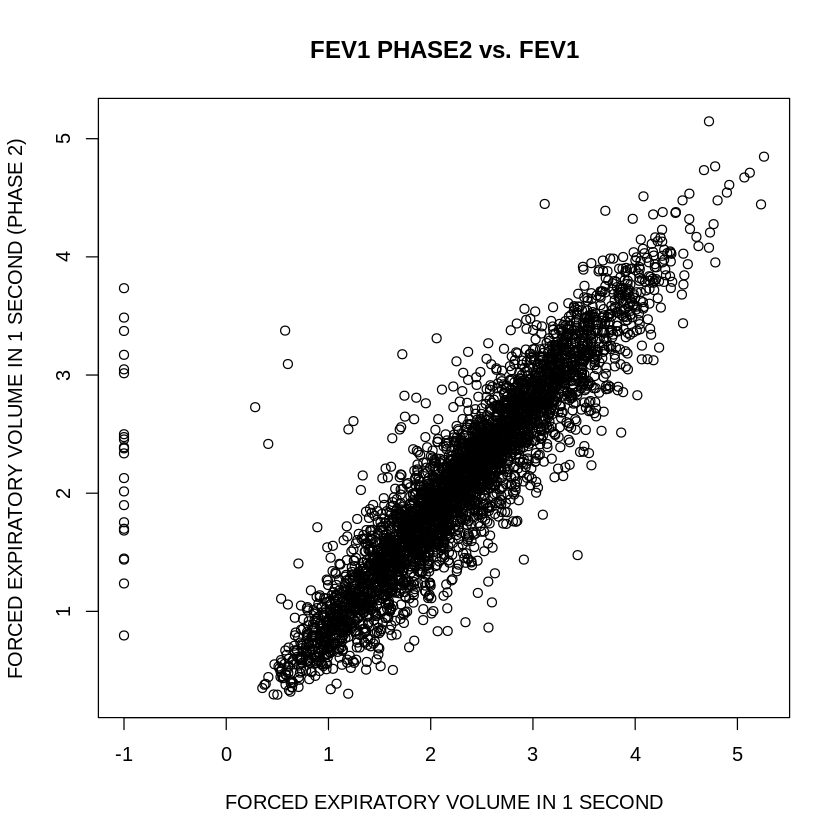

In [ ]:
#plotting FEV1 phase 2 vs FEV1
plot(dat1$FEV1, dat1$FEV1_phase2, main = "FEV1 PHASE2 vs. FEV1", xlab = "FORCED EXPIRATORY VOLUME IN 1 SECOND", ylab = "FORCED EXPIRATORY VOLUME IN 1 SECOND (PHASE 2)")

There is a positive linear correlation between FEV1 and FEV1_PHASE2.

In [ ]:
#fitting a linear regression model
fit_linear <- lm(FEV1_phase2 ~ FEV1, data = dat1)
#output summary of linear regression
summary(fit_linear)


Call:
lm(formula = FEV1_phase2 ~ FEV1, data = dat1)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.5909 -0.1880 -0.0144  0.1609  4.3971 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 0.178336   0.016943   10.53   <2e-16 ***
FEV1        0.840423   0.006859  122.53   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.3789 on 3998 degrees of freedom
Multiple R-squared:  0.7897,	Adjusted R-squared:  0.7897 
F-statistic: 1.501e+04 on 1 and 3998 DF,  p-value: < 2.2e-16


79% of the variablity in FEV1_phase2 is explained by the inclusion of FEV1 in the regression.

For one additional increase in the volume of FEV1, FEV1_phase2 increases by 0.84.

Patients with zero volume in FEV1 have an average FEV1_phase2 volume of 0.178.

In [ ]:
#output 95% confidence interval
confint(fit_linear)

,2.5 %,97.5 %
(Intercept),0.1451177,0.2115549
FEV1,0.8269759,0.8538708


Because the confidence interval does not include 1 and is less than it, then that concludes that there is enough evidence to show that the groups are significantly different and less than 1.




---



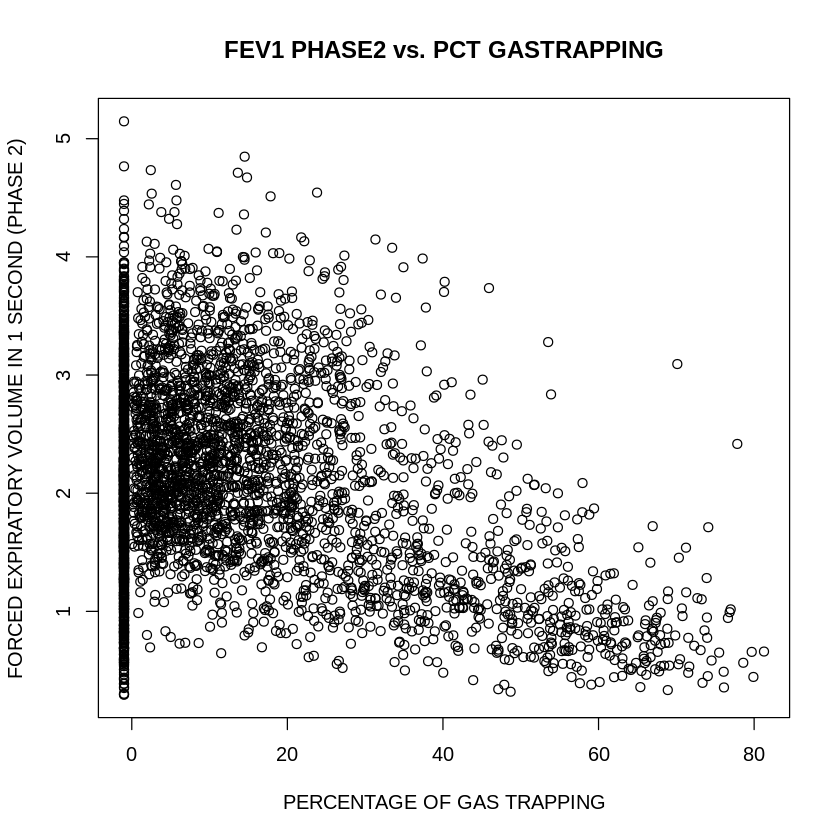

In [ ]:
#plotting FEV1 phase 2 vs PCT Gastrapping
plot(dat1$pct_gastrapping, dat1$FEV1_phase2, main = "FEV1 PHASE2 vs. PCT GASTRAPPING", xlab = "PERCENTAGE OF GAS TRAPPING", ylab = "FORCED EXPIRATORY VOLUME IN 1 SECOND (PHASE 2)")

There is a negative exponential correlation between the percent gastrapping and FEV1 phase 2 values.

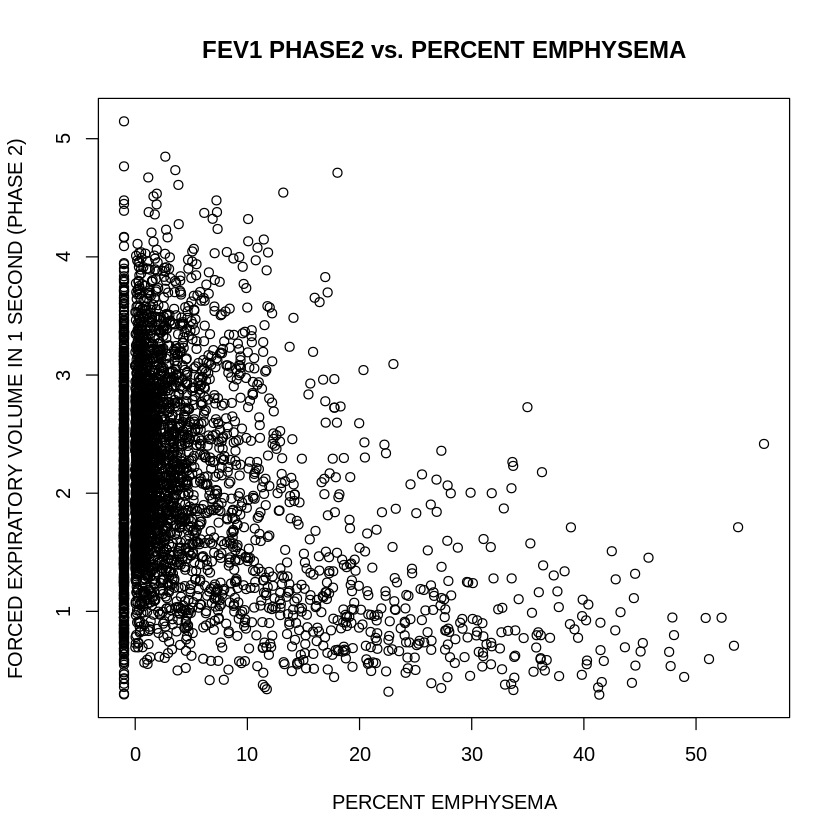

In [ ]:
#plotting FEV1 phase 2 vs percent emphysema
plot(dat1$pct_emphysema, dat1$FEV1_phase2, main = "FEV1 PHASE2 vs. PERCENT EMPHYSEMA", xlab = "PERCENT EMPHYSEMA", ylab = "FORCED EXPIRATORY VOLUME IN 1 SECOND (PHASE 2)")

There is a negative exponential correlation between the percent emphysema and FEV1 phase 2 values.

In [ ]:
#fitting a regression model
fit_reg <- lm(FEV1_phase2 ~ FEV1 + (pct_gastrapping)^2 + pct_gastrapping + (pct_emphysema)^2 + pct_emphysema, data = dat1)
#output summary of regression
summary(fit_reg)


Call:
lm(formula = FEV1_phase2 ~ FEV1 + (pct_gastrapping)^2 + pct_gastrapping + 
    (pct_emphysema)^2 + pct_emphysema, data = dat1)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.5763 -0.1830 -0.0161  0.1575  4.2874 

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)      0.2878399  0.0197901  14.545  < 2e-16 ***
FEV1             0.8140136  0.0072369 112.481  < 2e-16 ***
pct_gastrapping -0.0028726  0.0005335  -5.385 7.67e-08 ***
pct_emphysema   -0.0023264  0.0011719  -1.985   0.0472 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.374 on 3996 degrees of freedom
Multiple R-squared:  0.7952,	Adjusted R-squared:  0.7951 
F-statistic:  5173 on 3 and 3996 DF,  p-value: < 2.2e-16


In [ ]:
#output 95% confidence interval
confint(fit_reg)

,2.5 %,97.5 %
(Intercept),0.249040307,3.266394e-01
FEV1,0.799825314,8.282020e-01
pct_gastrapping,-0.003918462,-1.826685e-03
pct_emphysema,-0.004623844,-2.885928e-05


Although the interval is extremely close to zero, because it does not include 0 and is more than it, then that concludes that there is enough evidence to show that the groups are significantly different and less than 0.

<br>

---

<br>






In [ ]:
#creating random subsets of train and valid for the predictions
set.seed(5)
samplev <- sample(1:nrow(dat1), 3000)
train <- dat1[samplev, ]
valid <- dat1[-samplev, ]

In [ ]:
#altering the regression line to the train dataset
fit_reg_train <- lm(FEV1_phase2 ~ FEV1 + pct_gastrapping + (pct_emphysema)^2 + pct_emphysema, data = train)

In [ ]:
#crearting the MSE function
mse <- function(true, pred) {
  return(mean((true - pred)^2))
}

In [ ]:
#making the predictions and calculating the mse
prediction <- predict(fit_reg_train, valid)
truth  <- valid$FEV1_phase2
mse(truth, prediction)

[1] 0.1271231

The root mean squared error is 0.127. In general, the root squared mean error should be as close to zero to predict the data accurately. Since the mean is 0.127, the error is small. But compared to my best preforming regression model, which calculated an MSE of 0.074, this is way larger than it could be.

<br>

---

<br>






In [ ]:
#creating the final regression line including all the important variables
fit_r <- lm(FEV1_phase2 ~ I(pct_gastrapping^3) + I(pct_gastrapping^2) + pct_gastrapping + pct_emphysema + gender + visit_age +
 Duration_Smoking +  total_lung_capacity  + I(insp_meanatt^4)+ I(insp_meanatt^3) + I(insp_meanatt^2) + insp_meanatt +
I(insp_meanatt^3) + I(exp_meanatt^2) + exp_meanatt + I(FEV1^4) + I(FEV1^3) + I(FEV1^2) + FEV1 + FVC
 , data = train)

#outputting a summary of the regression line
summary(fit_r)

#creating the predictions and calculating the mse
prediction_r <- predict(fit_r, valid)
truth  <- valid$FEV1_phase2
mse(truth, prediction_r)


Call:
lm(formula = FEV1_phase2 ~ I(pct_gastrapping^3) + I(pct_gastrapping^2) + 
    pct_gastrapping + pct_emphysema + gender + visit_age + Duration_Smoking + 
    total_lung_capacity + I(insp_meanatt^4) + I(insp_meanatt^3) + 
    I(insp_meanatt^2) + insp_meanatt + I(insp_meanatt^3) + I(exp_meanatt^2) + 
    exp_meanatt + I(FEV1^4) + I(FEV1^3) + I(FEV1^2) + FEV1 + 
    FVC, data = train)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.68234 -0.15440 -0.00296  0.15912  2.46552 

Coefficients:
                       Estimate Std. Error t value Pr(>|t|)    
(Intercept)           1.074e+00  6.896e-02  15.568  < 2e-16 ***
I(pct_gastrapping^3)  2.221e-06  9.488e-07   2.341 0.019304 *  
I(pct_gastrapping^2) -2.240e-04  9.819e-05  -2.281 0.022593 *  
pct_gastrapping       4.996e-03  3.291e-03   1.518 0.129163    
pct_emphysema        -4.284e-03  1.753e-03  -2.444 0.014588 *  
genderMale            8.829e-02  1.495e-02   5.905 3.92e-09 ***
visit_age            -7.872e-04  7.176e-04

[1] 0.07464541

In [ ]:
#making the predictions of the missing values
FEV1_phase2_predictionsfinal <- predict(fit_r, dat2)

In [ ]:
#creating a csv file of the predictions
preds <- data.frame(sid = dat2$sid, FEV1_phase2_predictionsfinal)
write.csv(preds, 'copd_predictions.csv')

<br>

---

<br>






Chronic Obstructive Pulmonary Disease (COPD) is a disease that is caused by lung damage from smoking and inhalation of harmful chemicals. One of its symptoms is trouble breathing due to inflamed and/or damaged airways. The dataset which was provided gave a huge insight on the disease’s effects and causes. This data, although of different types, was used collectively to reach the conclusion of the analysis. The analysis in the project was mainly focused on finding a correlation between the forced expiratory volume in 1 second (FEV1) at phase 2 and other variables in the dataset. FEV1 was one of the most important variables in the dataset because it is a great determinant of the lung health of the patients. Patients who exhaled a higher volume of air had healthier lungs, vice versa. Finding the variables which have the largest effect on FEV1 at phase 2 was the most interesting part of the analysis.

The visualizations of FEV1 phase 2 vs. smoking status were detrimental to the analysis. They proved that the patients who had never smoked before had a higher FEV1 phase 2 median, which depicted healthier lungs. As opposed to the patients who had smoked before, which had a lower FEV1 phase 2 median. The t-test calculated the 95% confidence difference interval of FEV1 phase 2 means of current and former smokers. The interval, [0.08155305, 0.18408473], represented a range which contains the true mean difference of both samples. Due to the fact that the range did not include 0, that proved that the two averages were not equal. Further box plots showed that male patients had higher FEV1 phase 2 medians in comparison to females. With a FEV1 vs FEV1 phase 2 scatterplot, I calculated that with every 1 volume increase in FEV1 there was a 0.840423 volume increase in FEV1 phase 2. This corresponds to the positive linear relationship between the two variables. Further plots for FEV1 phase 2 vs. percent gas trapping and FEV1 phase 2 vs. percent emphysema were made. Both exhibited a quadratic correlation with FEV1 phase 2. With only these 2 variables, 80% of the variability in FEV1 phase 2 was explained. Once the rest of the relevant variables were added onto the regression formula, 87% of the variability in FEV1 phase 2 could be explained.

In order to test that the regression model was accurate in predicting FEV1 phase 2 values, 75:25 train to valid subsets were created. I used the MSE to test the accuracy of the train set model on the valid dataset. It was tricky because the closer that the MSE was to 0, the more accurately the predictions were, but if the MSE was too close to 0, then the regression line was overfitting. The calculated MSE was 0.0746, which was the lowest MSE I achieved without overfitting.

From this analysis, I was able to find a regression formula which accurately predicted future values of FEV1 phase 2. Moreover, analyzing how the FEV1 phase 2 values behaved in response to the other variables was crucial. From it, I reached the conclusion that the variables with the most impact on FEV1 phase 2 were smoking status, gender, percent gas trapping, total lung capacity, and average lung density at expiration. Through the visualizations and the regression analysis I was able to come to these conclusions and further my knowledge on how to prevent and decrease the number of COPD patients.
